In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ev_data=pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
ev_data=ev_data.dropna()

 EV Adoption Over Time

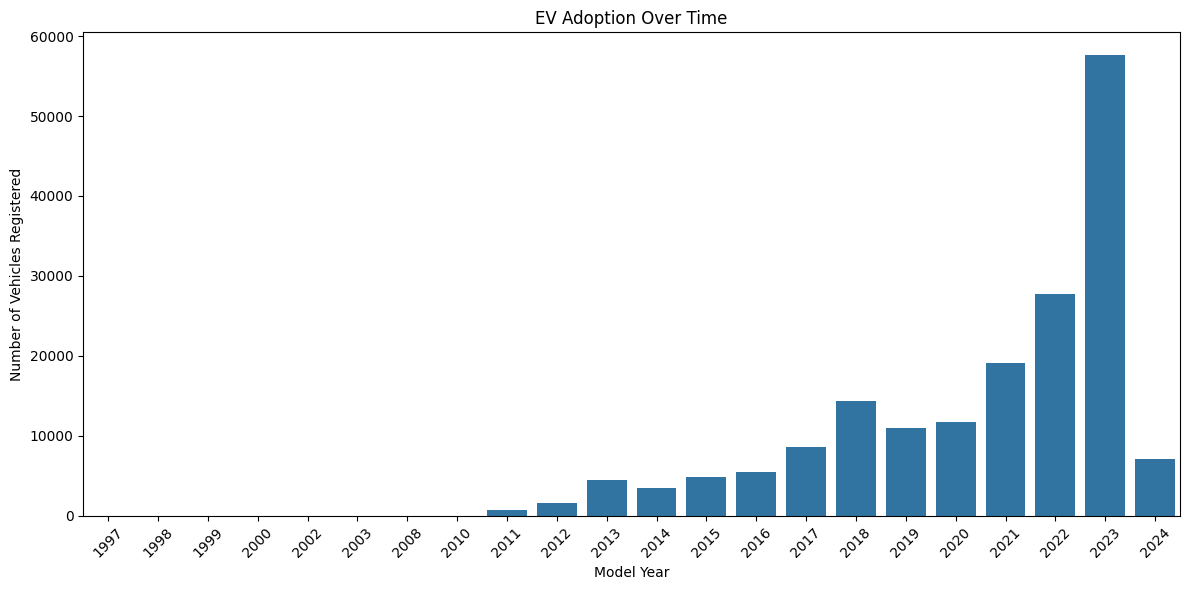

In [14]:
plt.figure(figsize=(12,6))
ev_adoption_by_year=ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
ev_county_distribution=ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

In [16]:
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_cities = ev_city_distribution_top_counties.head(10)

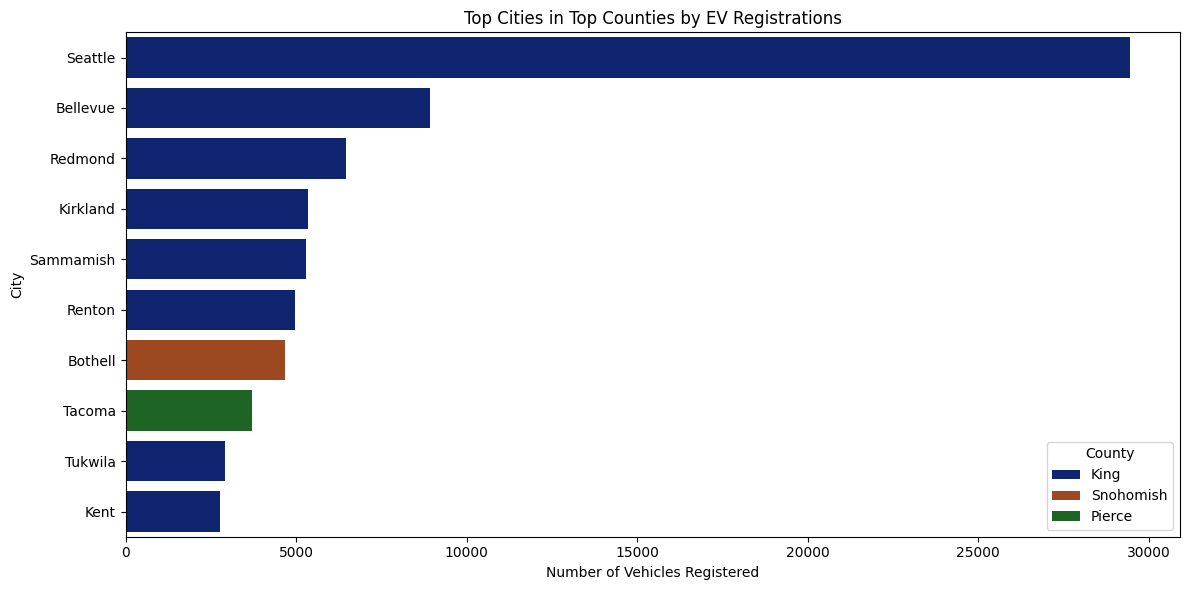

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_cities,x='Number of Vehicles', y= 'City',hue='County',palette="dark")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_26496\1583696461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')


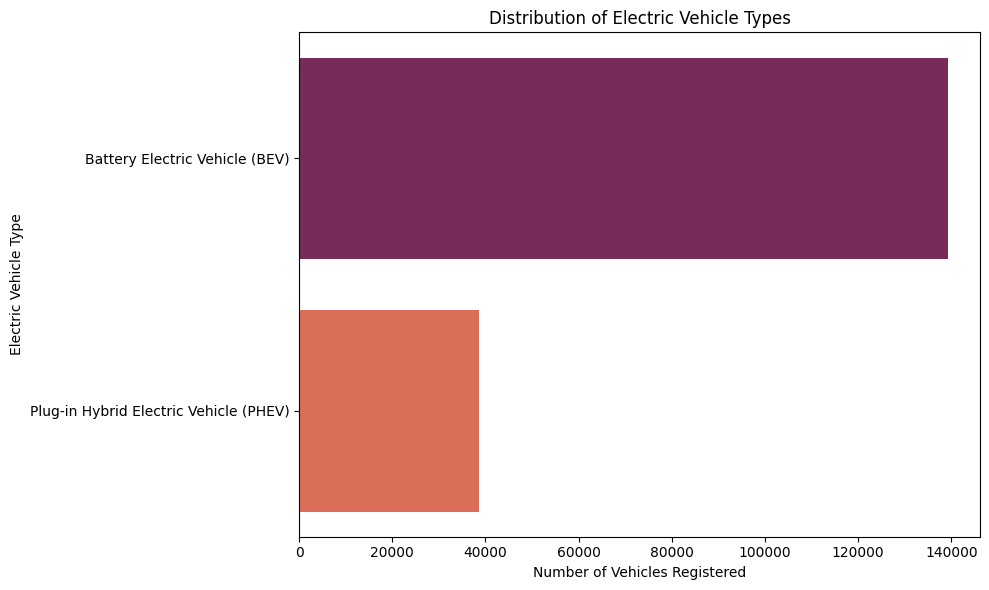

In [23]:
ev_type_distribution=ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_26496\368405835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette="pastel")


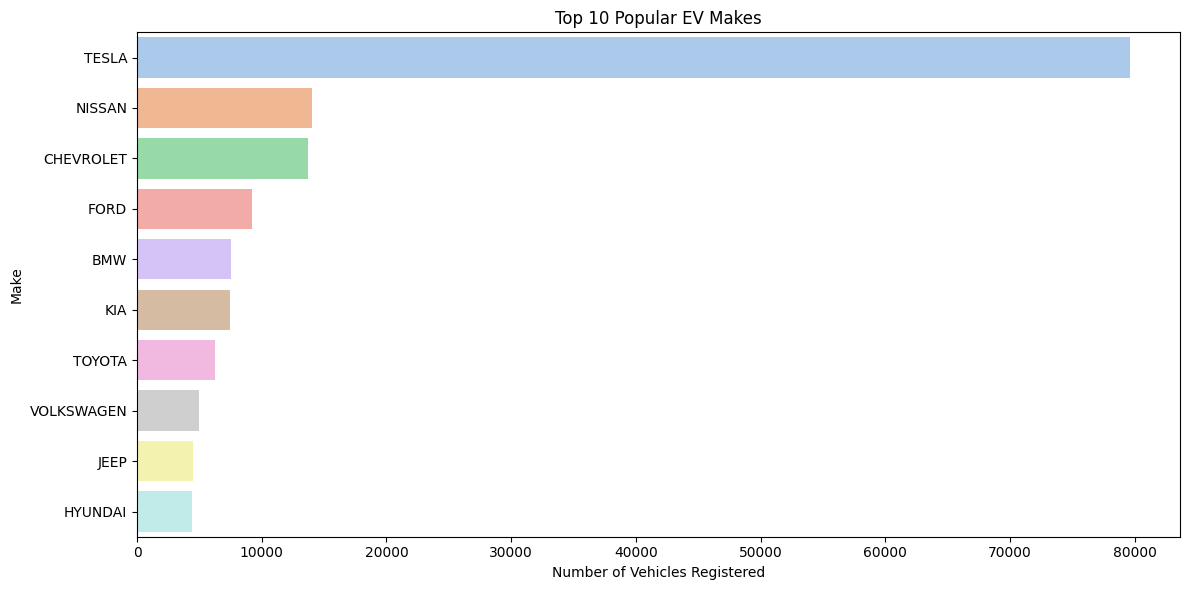

In [24]:
ev_make_distribution=ev_data['Make'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette="pastel")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()